This notebook presents some basic Exploratory data analysis (EDA) on the [beachfront demand forecasting dataset](https://www.kaggle.com/competitions/applications-of-deep-learning-wustlfall-2022). We begin by loading the tabular data.


In [1]:
import pandas as pd
import os

PATH_CSV = './data/beach_demand_forecast/'

df_sales = pd.read_csv(os.path.join(PATH_CSV,"sales_train.csv"))
df_items = pd.read_csv(os.path.join(PATH_CSV,"items.csv"))
df_resturant = pd.read_csv(os.path.join(PATH_CSV,"resturants.csv"))

df_sales.date = pd.to_datetime(df_sales.date, errors='coerce') 

Next we add two fields, weekday and week that represent the day of the week and the day of the current year.

In [2]:
df_sales.date = pd.to_datetime(df_sales.date, errors='coerce') 
df_sales['weekday'] = df_sales.date.dt.day_name()

start_date = df_sales.date.min()
df_sales['week'] = (((df_sales.date - start_date).dt.days)/7).astype(int)

Begin by producing a line graph of all sales over the provided 2-year timespan.

In [3]:
import plotly.express as px

df_plot = df_sales[['date','item_count']].groupby(['date']).sum().reset_index()
fig = px.line(df_plot, x="date", y="item_count", title='Total Sales by Date')
fig.show()

Next we see the amount of sales by day of the week.

In [6]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Obtain data aggregated by weekday.
df_plot = df_sales[['weekday','item_count']].groupby(['weekday']).sum().reset_index()
# Sort by day of week
df_plot = df_plot.set_index("weekday").loc[day_order].reset_index()

fig = px.bar(df_plot, x='weekday', y='item_count', title='Total Sales by Day of Week')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

Display total sales for a year.

In [5]:
SINGLE_YEAR = 2020

df_sales_single_year = df_sales[df_sales['date'].dt.year == SINGLE_YEAR]
df_plot = df_sales_single_year[['date','item_count']].groupby(['date']).sum().reset_index() 
fig = px.bar(df_plot, x='date', y='item_count',facet_col_spacing=0, title=f'Total Sales by Day {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

# Most Popular Items

Unique item id's.

In [7]:
df_sales.item_id.unique()

array([  3,   4,  12,  13,  16,  19,  21,  23,  27,  35,  42,  45,  56,
        59,  67,  73,  75,  76,  90,  91,  93,   1,   2,   5,   6,   7,
         8,   9,  10,  11,  14,  15,  17,  18,  20,  22,  24,  25,  26,
        28,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  41,
        43,  44,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  57,
        58,  60,  61,  62,  63,  64,  65,  66,  68,  69,  70,  71,  72,
        74,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  92,  94,  95,  96,  97,  98,  99, 100])

Most popular items.

In [8]:
df2 = df_sales[['item_id','item_count']].groupby(['item_id']).sum().reset_index().sort_values('item_count',ascending=False)
df_items2 = df_items[['id','name']]
df_items2.columns = ['item_id','name']
df_popular = df2.merge(df_items2)
print(df_popular.to_string())

    item_id  item_count                                                  name
0        19    236337.0                                    Strawberry Smoothy
1        16    102990.0                                  Frozen Milky Smoothy
2        76     61043.0                                    Amazing pork lunch
3        38     52772.0                                         Mutton Dinner
4         9     43874.0                                          Orange Juice
5        59     42774.0                               Blue Ribbon Beef Entree
6         4     34439.0                       Amazing Steak Dinner with Rolls
7        13     27490.0                               Sweet Frozen Soft Drink
8        56     23839.0                       Sea Bass with Vegetables Dinner
9        67     18764.0                                       Sweet Lamb Cake
10       21     13190.0                     Amazing Fish with Vegetables Meal
11       12      7791.0                                  Fantast

# Individual Item Plots

Plot items per day.

In [9]:
df_plot = df_sales_single_year[['date','item_id','item_count']].groupby(['date','item_id']).sum().reset_index()
df_plot = df_plot.merge(df_items,left_on="item_id",right_on="id")[['date','item_count','name']]
fig = px.bar(df_plot, x='date', y='item_count',color="name", title=f'Item Sales by Date - {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

Plot items per week.

In [10]:
df_plot = df_sales_single_year[['week','item_id','item_count']].groupby(['week','item_id']).sum().reset_index()
df_plot = df_plot.merge(df_items,left_on="item_id",right_on="id")[['week','item_count','name']]
fig = px.bar(df_plot, x='week', y='item_count',color="name", title=f'Total Sales by Week - {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

Plot items per day of week.

In [11]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df_plot = df_sales[['weekday','item_id','item_count']].groupby(['weekday','item_id']).sum().reset_index()
df_plot = df_plot.set_index('weekday').loc[day_order].reset_index()
df_plot = df_plot.merge(df_items,left_on="item_id",right_on="id")[['weekday','item_count','name']]
fig = px.bar(df_plot, x='weekday', y='item_count',color="name", title=f'Total Sales by Day of Week - {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

# Histogram and KDE of sales

## Using Matplotlib

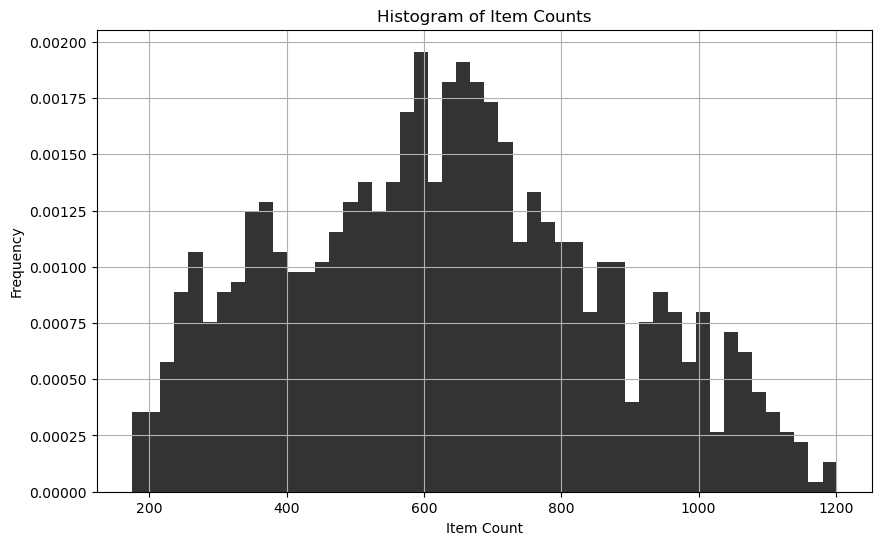

In [12]:
import matplotlib.pyplot as plt

df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()

plt.figure(figsize=(10, 6))
plt.hist(df_plot["item_count"], bins=50, alpha=0.8, color = "k", density=True)

plt.grid(True)
plt.title('Histogram of Item Counts')
plt.xlabel('Item Count')
plt.ylabel('Frequency')

plt.show()


## Using Plotly

In [13]:
import plotly.express as px

df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()
fig = px.histogram(df_plot, x='item_count', title='Histogram of Item Counts', marginal="box")
fig.update_layout(bargap=0.0,bargroupgap=0.0)
# fig.update_layout(width=1200) 
fig.show()

## KDE

In [17]:
import plotly.figure_factory as ff

df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()
fig = ff.create_distplot([df_plot["item_count"].values], ["sales"], curve_type='kde', bin_size=50)
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [18]:
a = df_sales.loc[df_sales["item_id"] == 59]
fig = ff.create_distplot([a["item_count"].values], ["sales"], bin_size=20)
fig.update_layout(title_text='Distplot with for item 59')
fig.show()


In [19]:
a = df_sales.loc[df_sales["item_id"] == 59]
fig = ff.create_distplot([a["item_count"].values], ["sales"], bin_size=20,  curve_type='normal')
fig.update_layout(title_text='Distplot with for item 59 and plotted normal curve')
fig.show()


array([[<Axes: title={'center': 'item_count'}>]], dtype=object)

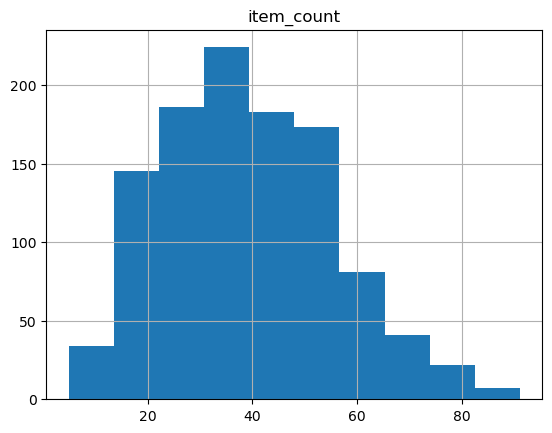

In [50]:
a.hist("item_count")

## Using seaborn

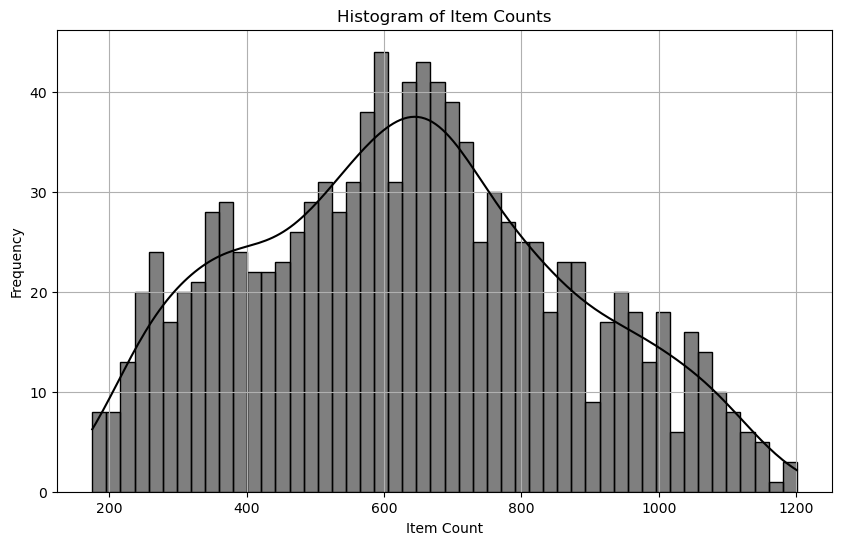

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()
sns.histplot(df_plot["item_count"], bins=50, color='k', kde=True)
plt.grid(True)
plt.title('Histogram of Item Counts')
plt.xlabel('Item Count')
plt.ylabel('Frequency')
plt.show()

/var/folders/tf/tzhjhrlj1_x14gcsq_wsn4580000gn/T/ipykernel_8140/1291575770.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




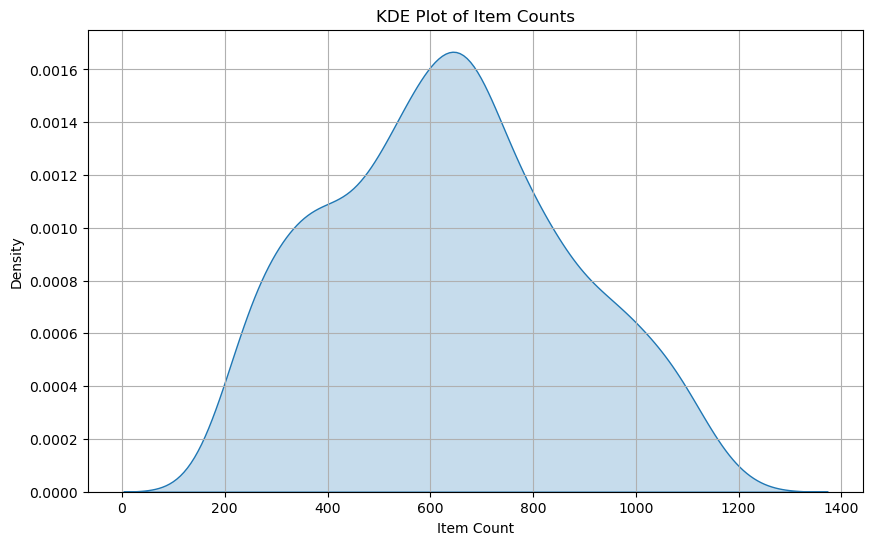

In [23]:
import seaborn as sns

import matplotlib.pyplot as plt

# Assuming 'a' is the DataFrame containing the data for item 59
plt.figure(figsize=(10, 6))
df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()
sns.kdeplot(df_plot['item_count'], shade=True)
plt.title('KDE Plot of Item Counts')
plt.xlabel('Item Count')
plt.ylabel('Density')
plt.grid(True)
plt.show()

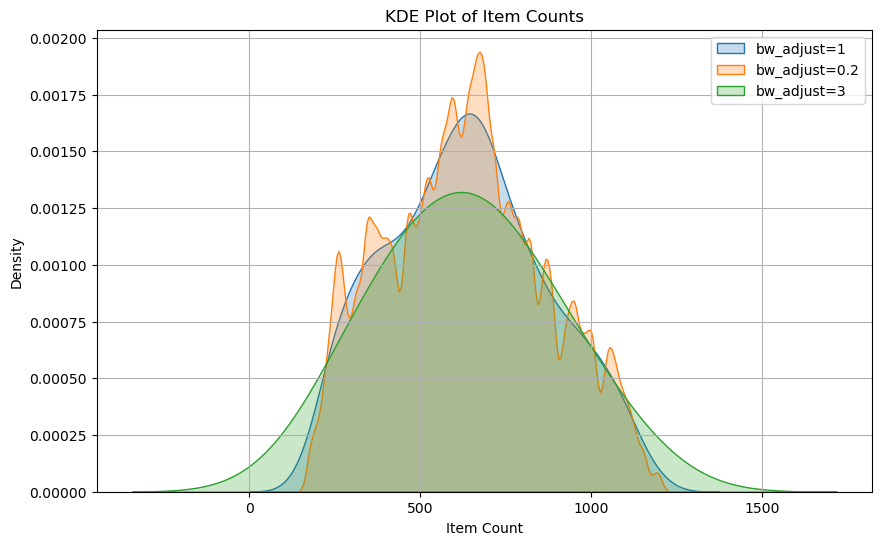

In [37]:
import seaborn as sns

import matplotlib.pyplot as plt

# Assuming 'a' is the DataFrame containing the data for item 59
plt.figure(figsize=(10, 6))
df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()
# sns.kdeplot(df_plot['item_count'], fill=True, bw_method="silverman")
sns.kdeplot(df_plot['item_count'], fill=True)
sns.kdeplot(df_plot['item_count'], fill=True, bw_adjust=0.2)
sns.kdeplot(df_plot['item_count'], fill=True, bw_adjust=3)
plt.title('KDE Plot of Item Counts')
plt.xlabel('Item Count')
plt.ylabel('Density')
plt.legend(['bw_adjust=1', 'bw_adjust=0.2', 'bw_adjust=3'])
plt.grid(True)
plt.show()

# ECDF

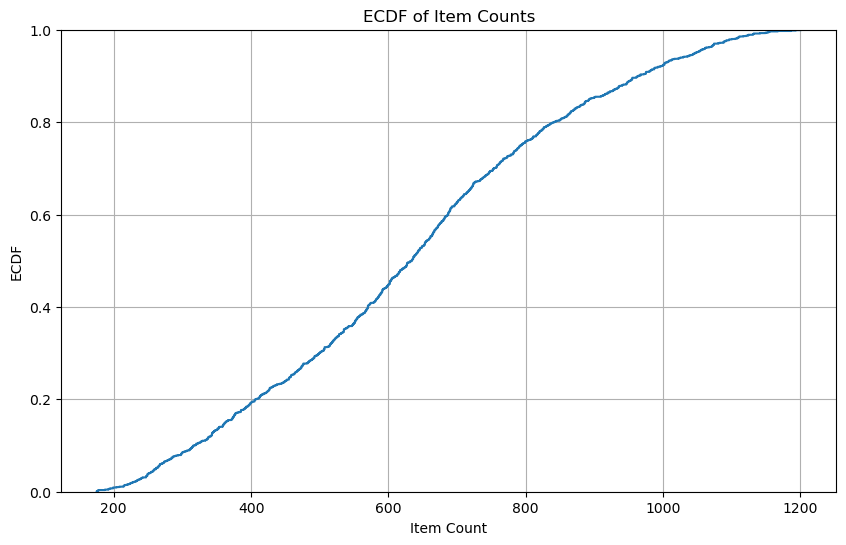

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()

plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df_plot, x='item_count', stat="proportion")
plt.xlabel('Item Count')
plt.ylabel('ECDF')
plt.title('ECDF of Item Counts')
plt.grid(True)
plt.show()

# QQ Plots

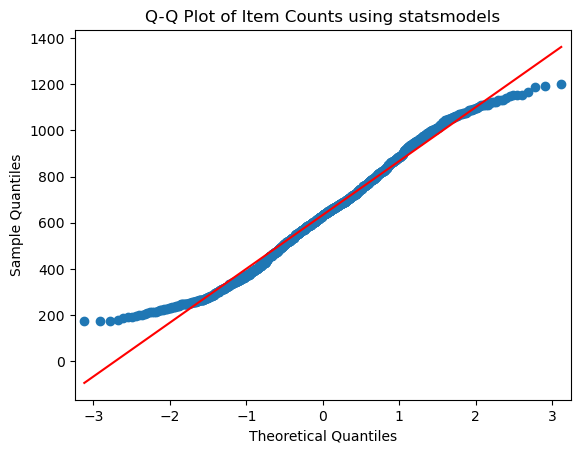

In [51]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()

# Generate Q-Q plot, when using only one sample it is compared to a normal distribution
sm.qqplot(df_plot['item_count'], line='s')
plt.title('Q-Q Plot of Item Counts using statsmodels')
plt.show()

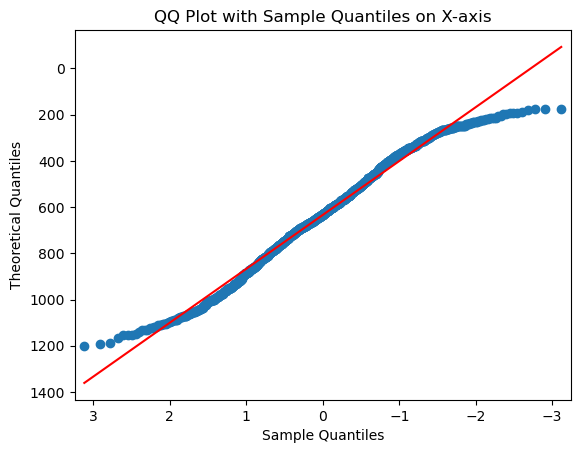

In [52]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()

# Generate the QQ plot data
qq = sm.qqplot(df_plot['item_count'], line="s")

# Swap axes by flipping the plot limits and labels
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel("Sample Quantiles")
plt.ylabel("Theoretical Quantiles")
plt.title("QQ Plot with Sample Quantiles on X-axis")
plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def reverse_normal_plot(data, ax=None, scatter_kws=None):
    """
    Create a normal probability plot with sample quantiles on x-axis
    and theoretical normal quantiles on y-axis.
    
    Parameters:
    -----------
    data : array-like
        Dataset to test for normality
    ax : matplotlib.axes.Axes, optional
        Axes object to plot on
    scatter_kws : dict, optional
        Additional keywords to pass to scatter plot
    
    Returns:
    --------
    matplotlib.axes.Axes
        The axes object with the plot
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 8))
    
    if scatter_kws is None:
        scatter_kws = {'alpha': 0.5}
    
    # Convert input to array and standardize it
    x = np.asarray(data)
    x_std = (x - np.mean(x)) / np.std(x, ddof=1)
    x_std_sorted = np.sort(x_std)
    
    # Calculate theoretical quantiles
    n = len(x)
    p = np.linspace(0.5/n, (n-0.5)/n, n)  # Using (i-0.5)/n plotting positions
    theoretical_quantiles = stats.norm.ppf(p)
    
    # Create the plot with sample quantiles on x-axis
    ax.scatter(x_std_sorted, theoretical_quantiles, **scatter_kws)
    
    # Add the diagonal reference line
    line_min = min(x_std_sorted.min(), theoretical_quantiles.min())
    line_max = max(x_std_sorted.max(), theoretical_quantiles.max())
    ax.plot([line_min, line_max], [line_min, line_max], 'r--', alpha=0.8)
    
    # Labels and title
    ax.set_xlabel('Standardized Sample Quantiles')
    ax.set_ylabel('Theoretical Normal Quantiles')
    ax.set_title('Normal Probability Plot')
    
    # Make the plot square
    ax.set_aspect('equal')
    
    return ax

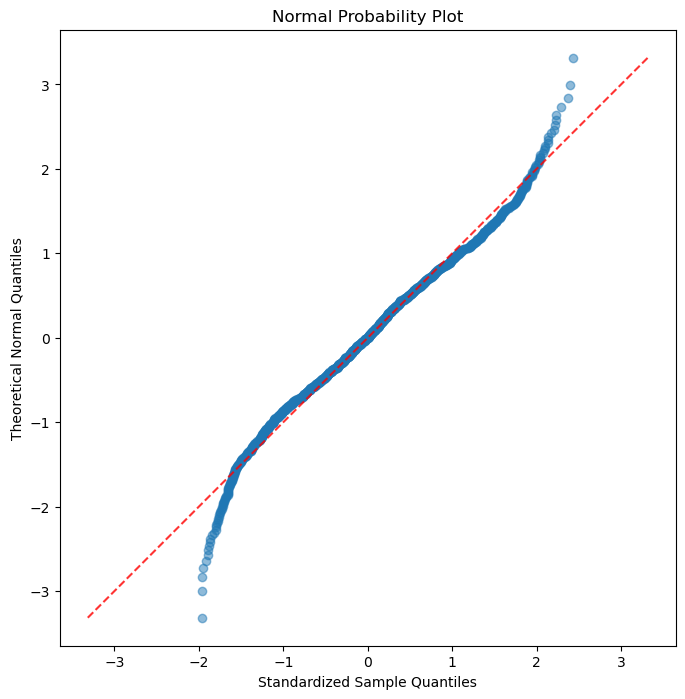

In [61]:
df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()

reverse_normal_plot(df_plot["item_count"])
plt.show()

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def create_half_normal_plot(data, title="Half-Normal Plot"):
    """
    Create a half-normal plot using scipy's probplot function.
    
    Parameters:
    -----------
    data : array-like
        The data to be plotted
    title : str
        Title of the plot
    """
    # Take absolute values of the data
    abs_data = np.abs(data)
    
    # Create the plot using scipy's probplot
    fig, ax = plt.subplots(figsize=(10, 6))
    stats.probplot(abs_data, dist='halfnorm', plot=ax)
    
    # Customize the plot
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    
    return fig, ax

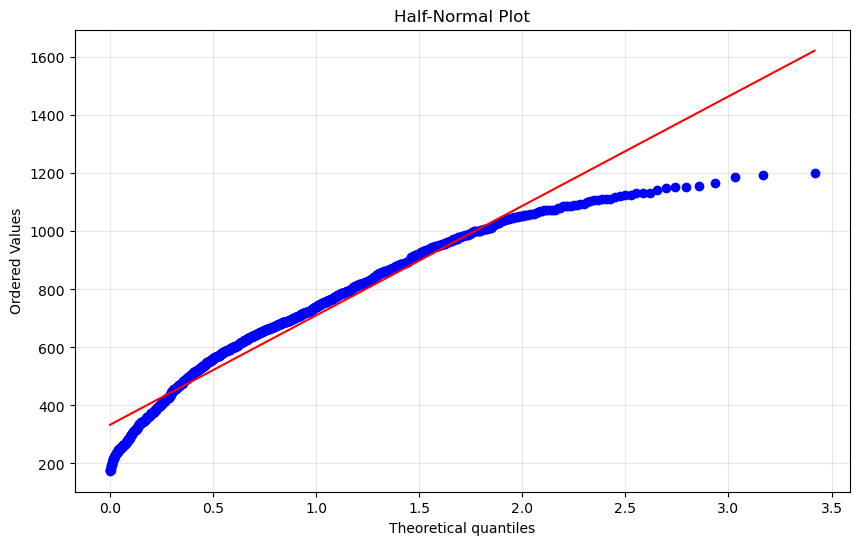

In [70]:
df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()

create_half_normal_plot(df_plot["item_count"])
plt.show()

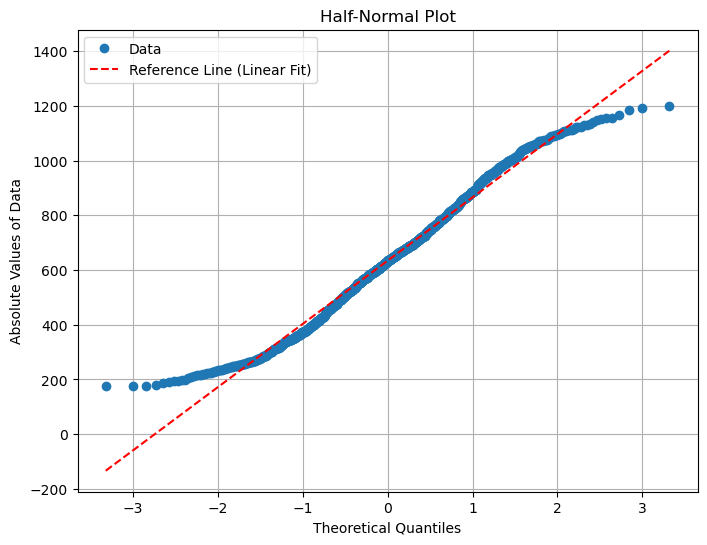

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sample data: Absolute values of some random effects or residuals
df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()

abs_data = np.abs(df_plot["item_count"].values)

# Sort the absolute data
sorted_data = np.sort(abs_data)

# Calculate theoretical quantiles for a half-normal distribution
n = len(sorted_data)
theoretical_quantiles = stats.norm.ppf((np.arange(1, n + 1) - 0.5) / n)

# Fit a line to the data points for the reference line
slope, intercept = np.polyfit(theoretical_quantiles, sorted_data, 1)
fit_line = slope * theoretical_quantiles + intercept

# Plot the data points against the theoretical quantiles
plt.figure(figsize=(8, 6))
plt.plot(theoretical_quantiles, sorted_data, 'o', label='Data')
plt.plot(theoretical_quantiles, fit_line, 'r--', label='Reference Line (Linear Fit)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Absolute Values of Data')
plt.title('Half-Normal Plot')
plt.legend()
plt.grid(True)
plt.show()

# Test for Normality

Shapiro-Wilk Test: Statistic=0.9838031989118534, p-value=1.0893568326803706e-09
Kolmogorov-Smirnov Test: Statistic=1.0, p-value=0.0
Jarque-Bera Test: Statistic=26.91216661095647, p-value=1.4325087137510734e-06
Anderson-Darling Test: Statistic=2.939621471945884, Critical Values=[0.574 0.654 0.784 0.915 1.088], Significance Level=[15.  10.   5.   2.5  1. ]


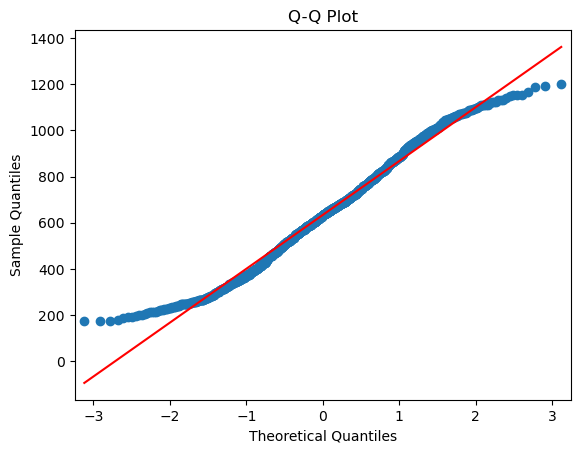

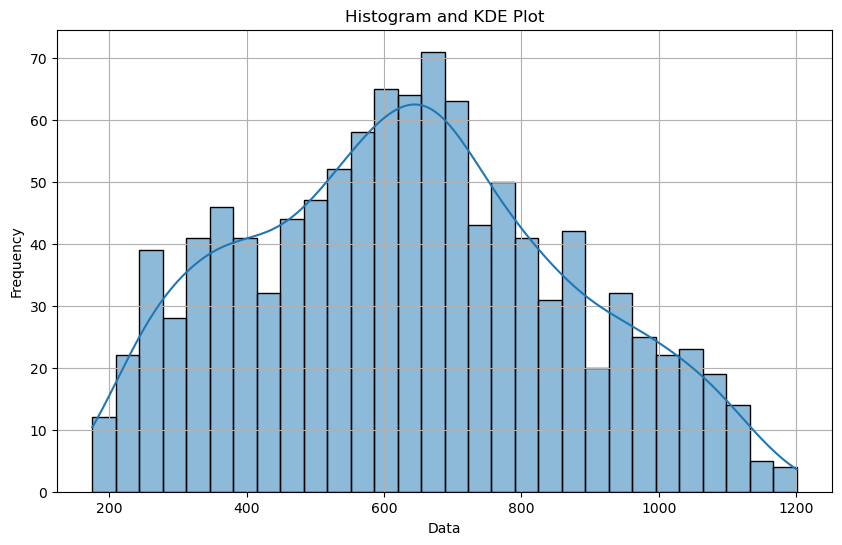

In [ ]:
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

# Generate some data (replace this with your actual data)
df_plot = df_sales[["date", "item_count"]].groupby("date").sum().reset_index()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_plot["item_count"])
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Kolmogorov-Smirnov Test
ks_test = stats.kstest(df_plot["item_count"], 'norm')
print(f"Kolmogorov-Smirnov Test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}")

# Perform the Jarque-Bera test
jb_test = stats.jarque_bera(df_plot["item_count"])
print(f"Jarque-Bera Test: Statistic={jb_test.statistic}, p-value={jb_test.pvalue}")

# Perform the Anderson-Darling test
ad_test = stats.anderson(df_plot["item_count"], dist='norm')
print(f"Anderson-Darling Test: Statistic={ad_test.statistic}, Critical Values={ad_test.critical_values}, Significance Level={ad_test.significance_level}")

# Perform the Cramer-von-Mises test
cvm_test = stats.cramervonmises(df_plot["item_count"], 'norm')
print(f"Cramer-von-Mises Test: Statistic={cvm_test.statistic}, p-value={cvm_test.pvalue}")

# Q-Q Plot
sm.qqplot(df_plot["item_count"], line='s')
plt.title('Q-Q Plot')
plt.show()

# Histogram and KDE Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_plot["item_count"], bins=30, kde=True)
plt.title('Histogram and KDE Plot')
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplots

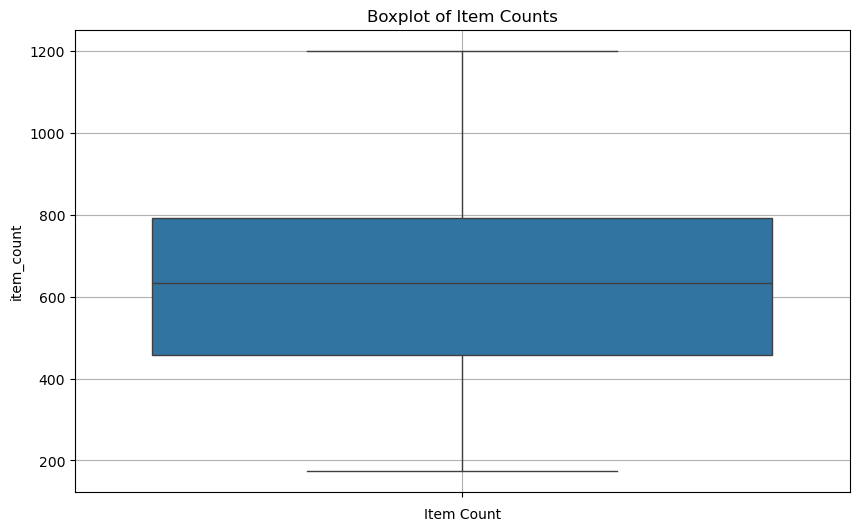

In [83]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_plot["item_count"], orient='v')
plt.title('Boxplot of Item Counts')
plt.xlabel('Item Count')
plt.grid(True)
plt.show()

# Data Transformation

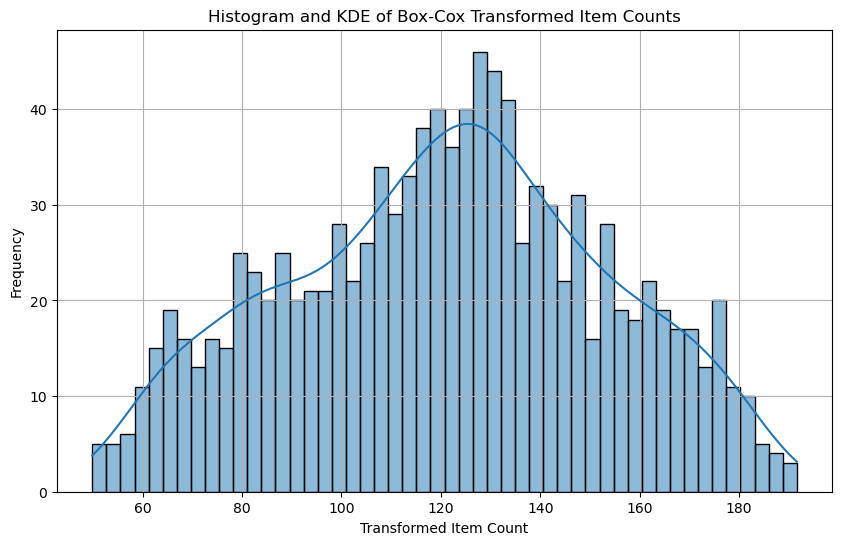

Fitted lambda for Box-Cox transformation: 0.6897628994020538


In [86]:
from scipy import stats

import matplotlib.pyplot as plt

# Apply Box-Cox transformation
df_plot['item_count_boxcox'], fitted_lambda = stats.boxcox(df_plot['item_count'] + 1)  # Adding 1 to avoid zero values

# Plot the transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df_plot['item_count_boxcox'], bins=50, kde=True)
plt.title('Histogram and KDE of Box-Cox Transformed Item Counts')
plt.xlabel('Transformed Item Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(f"Fitted lambda for Box-Cox transformation: {fitted_lambda}")

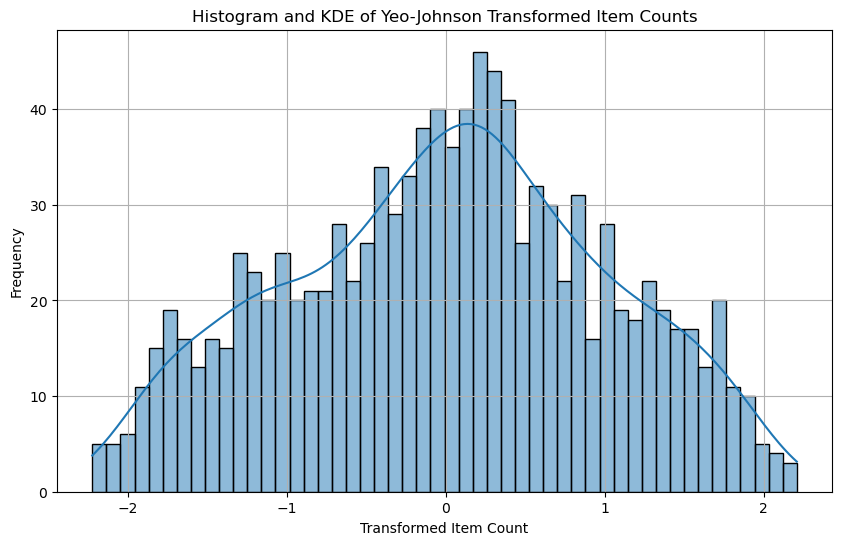

In [87]:
from sklearn.preprocessing import power_transform

# Apply Yeo-Johnson transformation
df_plot['item_count_yeojohnson'] = power_transform(df_plot[['item_count']], method='yeo-johnson')

# Plot the transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df_plot['item_count_yeojohnson'], bins=50, kde=True)
plt.title('Histogram and KDE of Yeo-Johnson Transformed Item Counts')
plt.xlabel('Transformed Item Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Transformed KDE

Funguje jen na jednoduchy transofrmace, napr. logaritmus, odmocninu, atd.

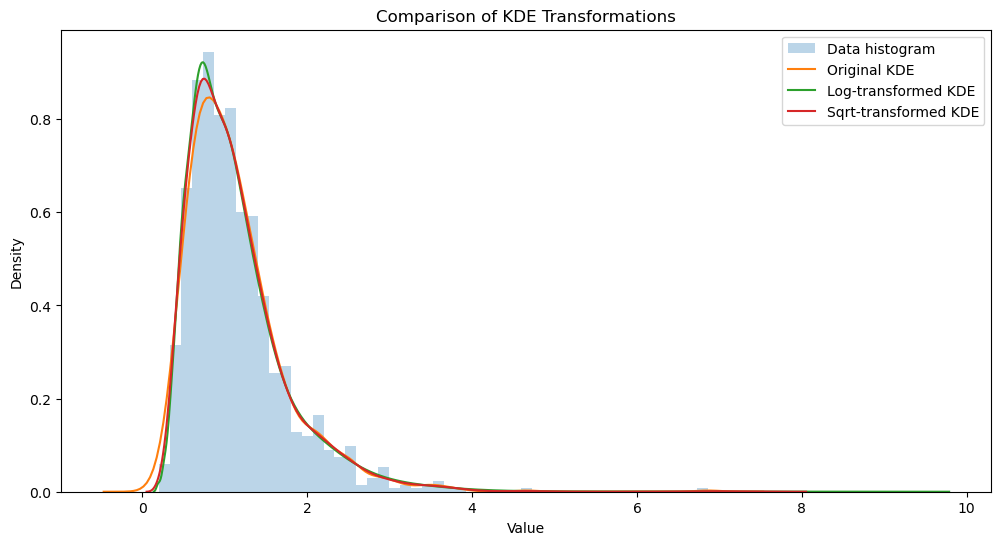

In [101]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def transform_kde(data, transform='log', bandwidth=None):
    """
    Perform KDE with data transformation
    
    Parameters:
    data: array-like, input data
    transform: str, transformation to apply ('log', 'sqrt', or None)
    bandwidth: float, bandwidth for KDE (None for Scott's rule)
    
    Returns:
    x_grid: array, points where density is evaluated
    density: array, estimated density values
    """
    
    # Apply transformation
    if transform == 'log':
        # Ensure data is positive
        if np.any(data <= 0):
            raise ValueError("Data must be positive for log transform")
        transformed_data = np.log(data)
    elif transform == 'sqrt':
        if np.any(data < 0):
            raise ValueError("Data must be non-negative for sqrt transform")
        transformed_data = np.sqrt(data)
    else:
        transformed_data = data
    
    # Fit KDE on transformed data
    kde = stats.gaussian_kde(transformed_data, bw_method=bandwidth)
    
    # Create grid of points for evaluation
    x_min, x_max = transformed_data.min(), transformed_data.max()
    margin = (x_max - x_min) * 0.1  # Add 10% margin
    x_grid_transformed = np.linspace(x_min - margin, x_max + margin, 200)
    
    # Get density estimates
    density_transformed = kde.evaluate(x_grid_transformed)
    
    # Transform back to original scale
    if transform == 'log':
        x_grid = np.exp(x_grid_transformed)
        # Apply change of variables formula
        density = density_transformed / x_grid
    elif transform == 'sqrt':
        x_grid = x_grid_transformed ** 2
        # Apply change of variables formula
        density = density_transformed / (2 * np.sqrt(x_grid))
    else:
        x_grid = x_grid_transformed
        density = density_transformed
    
    return x_grid, density

# Example usage
if __name__ == "__main__":
    # Generate sample right-skewed data
    np.random.seed(42)
    data = np.random.lognormal(0, 0.5, 1000)
    
    # Compute KDE with different transformations
    x_original, y_original = transform_kde(data, transform=None)
    x_log, y_log = transform_kde(data, transform='log')
    x_sqrt, y_sqrt = transform_kde(data, transform='sqrt')
    
    # Plot results
    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=50, density=True, alpha=0.3, label='Data histogram')
    plt.plot(x_original, y_original, label='Original KDE')
    plt.plot(x_log, y_log, label='Log-transformed KDE')
    plt.plot(x_sqrt, y_sqrt, label='Sqrt-transformed KDE')
    plt.legend()
    plt.title('Comparison of KDE Transformations')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

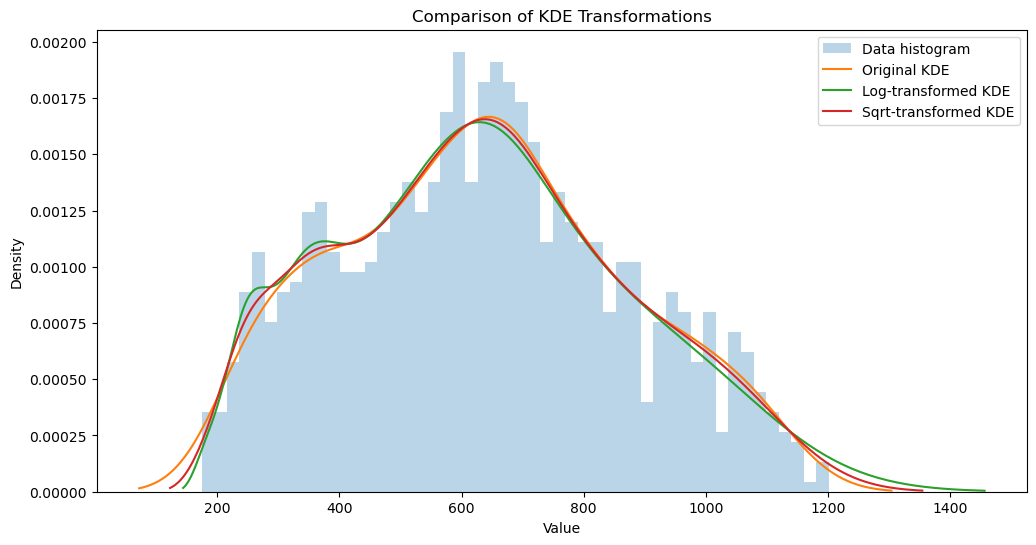

In [102]:
x_original, y_original = transform_kde(df_plot["item_count"], transform=None)
x_log, y_log = transform_kde(df_plot["item_count"], transform='log')
x_sqrt, y_sqrt = transform_kde(df_plot["item_count"], transform='sqrt')

# Plot results
plt.figure(figsize=(12, 6))
plt.hist(df_plot["item_count"], bins=50, density=True, alpha=0.3, label='Data histogram')
plt.plot(x_original, y_original, label='Original KDE')
plt.plot(x_log, y_log, label='Log-transformed KDE')
plt.plot(x_sqrt, y_sqrt, label='Sqrt-transformed KDE')
plt.legend()
plt.title('Comparison of KDE Transformations')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()